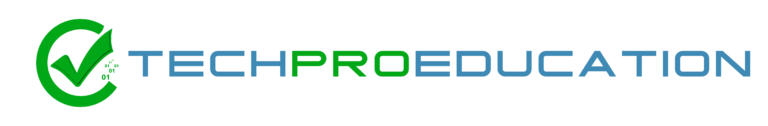

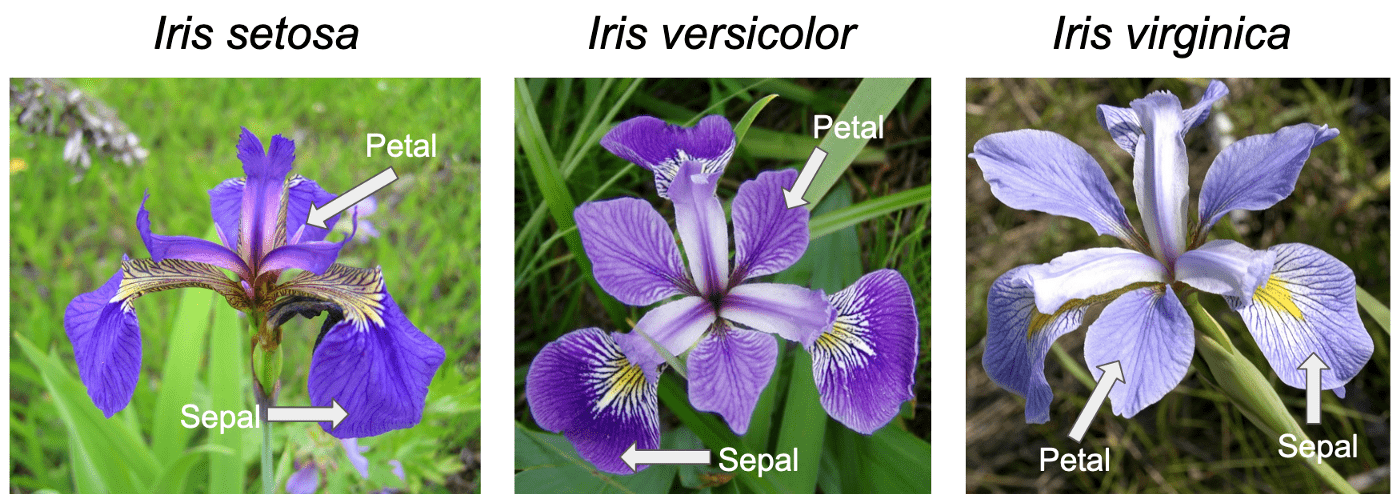

In [1]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa
...,...,...,...,...,...
145,6.700,3.000,5.200,2.300,virginica
146,6.300,2.500,5.000,1.900,virginica
147,6.500,3.000,5.200,2.000,virginica
148,6.200,3.400,5.400,2.300,virginica


In [ ]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

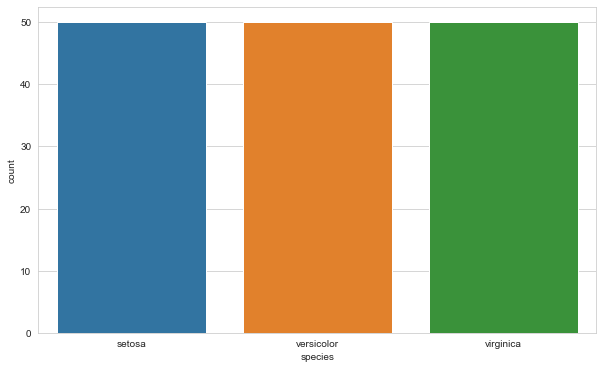

In [ ]:
sns.countplot(df['species']);

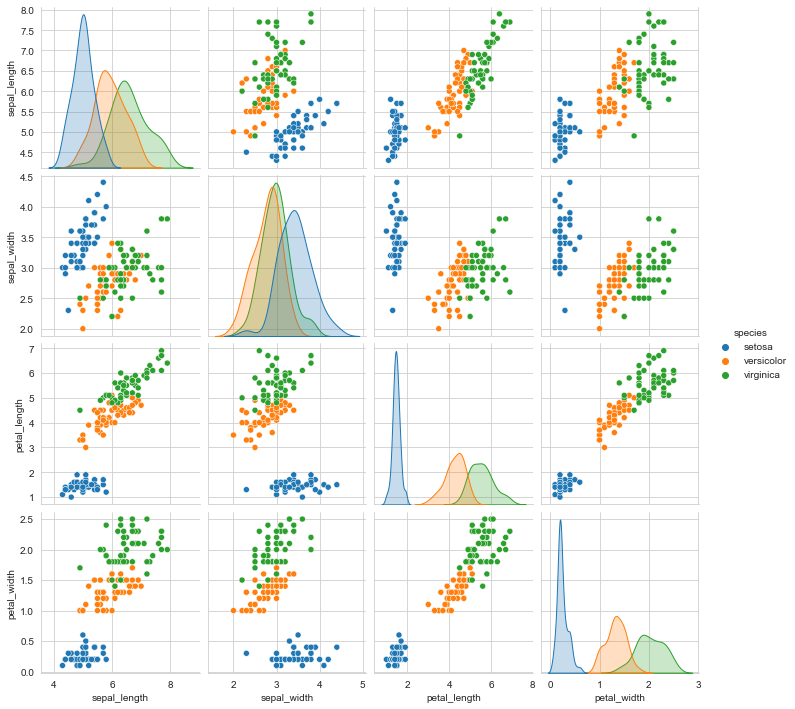

In [ ]:
sns.pairplot(df,hue='species');

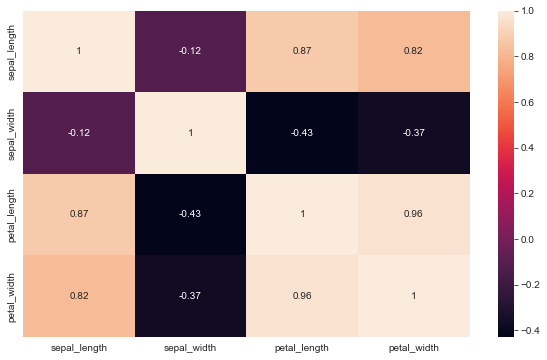

In [ ]:
sns.heatmap(df.corr(),annot=True);

In [ ]:
from keras import models
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
#Splitting the data into training and test
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)  
Y = pd.get_dummies(y1).values

#burda önce label encoder ile isimleri sayi yaptik, ve get_dummies ile de kendi icinde  output 3 farkli nöron cikiyor
#eger y sütununu direkt get_dummies yapsaydi, bu sekilde cikti almazdik, 3 ayri sütun olarak karmisiza cikardi,
# bu sekilde yaparak bir sütun icinde 3 ayri cikti gibi oldular

![](2022-11-03-21-26-39.png)

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

 #büyük Y harfini koymus, ve onu train ve test diye böldük

In [13]:
len(X_test)

30

0 = setosa
1 = versicolor
2 = virginica

In [14]:
model = Sequential()

model.add(Dense(units=4,activation='relu'))  #add yaparak sirayla hiddenlayer ekliyoruz
model.add(Dense(units=8,activation='tanh'))
model.add(Dense(units=6,activation='tanh'))
model.add(Dense(units=3,activation='softmax'))  #3tane class oldugu icin,softmax veriyoruz

#farkli action functionlari vermisler 

In [15]:
opt = Adam(lr = 0.003)                              
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=['accuracy']) 

#softmax kullandigimiz icin categorical_crossentropy bunu kullaniyoruz
#basari icin ise accuracy ile yapiyoruz

In [16]:
model.fit(x = X_train, y = y_train,batch_size= 15, epochs=100)

#early stopping vermemisiz

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 1.1740 - accuracy: 0.3667
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0990 - accuracy: 0.3583
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0664 - accuracy: 0.6167
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0362 - accuracy: 0.6417
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0106 - accuracy: 0.6917
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9761 - accuracy: 0.6917
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9469 - accuracy: 0.7000
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9071 - accuracy: 0.7000
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8600 - accuracy: 0.7000
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8014 - accuracy: 0.7000
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 3ms/step - loss: 0.0799 - accuracy: 0.9667
Epoch 85/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.9667
Epoch 86/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9833
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9750
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 0.9750
Epoch 89/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9667
Epoch 90/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0729 - accuracy: 0.9917
Epoch 91/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0713 - accuracy: 0.9750
Epoch 92/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0847 - accuracy: 0.9667
Epoch 93/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1228 - accuracy: 0.9500
Epoch 94/100
8/8 [===============

In [17]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (15, 4)                   20        
                                                                 
 dense_1 (Dense)             (15, 8)                   40        
                                                                 
 dense_2 (Dense)             (15, 6)                   54        
                                                                 
 dense_3 (Dense)             (15, 3)                   21        
                                                                 
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________


In [18]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [19]:
y_pred

array([[3.7180569e-05, 1.0178634e-02, 9.8978418e-01],
       [4.9748505e-03, 9.9038672e-01, 4.6384172e-03],
       [9.9227118e-01, 7.6807630e-03, 4.8032176e-05],
       [9.7483215e-05, 3.4618299e-02, 9.6528417e-01],
       [9.9072134e-01, 9.2409374e-03, 3.7702790e-05],
       [2.2093940e-05, 6.2088156e-03, 9.9376911e-01],
       [9.9159122e-01, 8.3697671e-03, 3.9005634e-05],
       [4.7854553e-03, 9.8433161e-01, 1.0883002e-02],
       [3.0016596e-03, 9.7610635e-01, 2.0892007e-02],
       [1.1273563e-02, 9.8596823e-01, 2.7582878e-03],
       [4.1926611e-04, 1.7831644e-01, 8.2126421e-01],
       [7.3718806e-03, 9.8647422e-01, 6.1538592e-03],
       [3.1145676e-03, 9.8072010e-01, 1.6165247e-02],
       [3.4016855e-03, 9.7410357e-01, 2.2494702e-02],
       [3.1307512e-03, 9.6648592e-01, 3.0383287e-02],
       [9.9149418e-01, 8.4672552e-03, 3.8507711e-05],
       [3.8279372e-03, 9.7226834e-01, 2.3903746e-02],
       [3.0764460e-03, 9.7745061e-01, 1.9473001e-02],
       [9.8988336e-01, 1.007

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [21]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

## birde dropout yapalim bakalim sonuclarimiz nasil degisecek dedik

In [22]:
model = Sequential()

model.add(Dense(units=4,activation='relu'))
model.add(Dropout(0.5))   #nöronlarin bazilarini söndürüyoruz
model.add(Dense(units=8,activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(units=6,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=3,activation='softmax'))

#istedigin gibi drop out koyabilirsin

optimizer ayarliyoruz

In [23]:
opt = Adam(lr = 0.006)                              
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=['accuracy']) 

Early stopping ekleyelim dedik

In [24]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 35) 

#kendimiz early stoopping ekledim

In [25]:
model.fit(x = X_train, y = y_train,batch_size= 30, epochs=150, callbacks = [early_stop])


#yukarida basarilar 1.0 di ama dropout kullaninca basari düstü,düsük verilerde dropout iyi degil

Epoch 1/150
4/4 [==============================] - 1s 4ms/step - loss: 1.1497 - accuracy: 0.3500
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 1.2102 - accuracy: 0.2917
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 1.1918 - accuracy: 0.2833
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 1.1533 - accuracy: 0.3500
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 1.1367 - accuracy: 0.3333
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 1.1606 - accuracy: 0.3083
Epoch 7/150
4/4 [==============================] - 0s 3ms/step - loss: 1.1297 - accuracy: 0.3417
Epoch 8/150
4/4 [==============================] - 0s 3ms/step - loss: 1.1324 - accuracy: 0.2917
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 1.0961 - accuracy: 0.3500
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 1.0939 - accuracy: 0.3583
Epoch 11/150
4/4 [===========

4/4 [==============================] - 0s 5ms/step - loss: 0.9150 - accuracy: 0.5167
Epoch 85/150
4/4 [==============================] - 0s 3ms/step - loss: 0.9379 - accuracy: 0.5667
Epoch 86/150
4/4 [==============================] - 0s 4ms/step - loss: 1.0031 - accuracy: 0.4750
Epoch 87/150
4/4 [==============================] - 0s 3ms/step - loss: 0.9384 - accuracy: 0.4917
Epoch 88/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8993 - accuracy: 0.5500
Epoch 89/150
4/4 [==============================] - 0s 4ms/step - loss: 0.9416 - accuracy: 0.4833
Epoch 90/150
4/4 [==============================] - 0s 4ms/step - loss: 0.9202 - accuracy: 0.4917
Epoch 91/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9440 - accuracy: 0.5000
Epoch 92/150
4/4 [==============================] - 0s 3ms/step - loss: 0.9312 - accuracy: 0.4917
Epoch 93/150
4/4 [==============================] - 0s 4ms/step - loss: 0.9486 - accuracy: 0.5083
Epoch 94/150
4/4 [===============

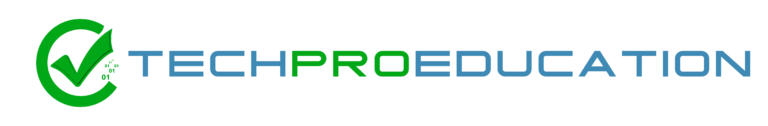